# Data Preparation on a Used Cars Pricing Dataset

## Dataset variables
https://archive.ics.uci.edu/dataset/10/automobile

|Variable Name|Role|Type|Description|Units|Missing Values
|-------- |------- |-------- |------- |-------- |------- |
|price|Feature|Continuous|continuous from 5118 to 45400||yes|
|highway-mpg|Feature|Continuous|continuous from 16 to 54||no|
|city-mpg|Feature|Continuous|continuous from 13 to 49||no|
|peak-rpm|Feature|Continuous|continuous from 4150 to 6600||yes|
|horsepower|Feature|Continuous|continuous from 48 to 288||yes|
|compression-ratio|Feature|Continuous|continuous from 7 to 23||no|
|stroke|Feature|Continuous|continuous from 2.07 to 4.17||yes|
|bore|Feature|Continuous|continuous from 2.54 to 3.94||yes|
|fuel-system|Feature|Categorical|1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi||no|
|engine-size|Feature|Continuous|continuous from 61 to 326||no|
|num-of-cylinders|Feature|Integer|eight, five, four, six, three, twelve, two||no|
|engine-type|Feature|Categorical|dohc, dohcv, l, ohc, ohcf, ohcv, rotor||no|
|curb-weight|Feature|Continuous|continuous from 1488 to 4066||no|
|height|Feature|Continuous|continuous from 47.8 to 59.8||no|
|width|Feature|Continuous|continuous from 60.3 to 72.3||no|
|length|Feature|Continuous|continuous from 141.1 to 208.1||no|
|wheel-base|Feature|Continuous|continuous from 86.6 120.9||no|
|engine-location|Feature|Binary|front, rear||no|
|drive-wheels|Feature|Categorical|4wd, fwd, rwd||no|
|body-style|Feature|Categorical|hardtop, wagon, sedan, hatchback, convertible||no|
|num-of-doors|Feature|Integer|four, two||yes|
|aspiration|Feature|Binary|std, turbo||no|
|fuel-type|Feature|Binary|diesel, gas||no|
|make|Feature|Categorical|alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo||no|
|normalized-losses|Feature|Continuous|continuous from 65 to 256||yes|
|symboling|Target|Integer|-3, -2, -1, 0, 1, 2, 3||no


## Set Up

In [ ]:
# install libraries
%pip install pandas numpy

# import libs
import pandas as pd
import numpy as np


## Utils

In [5]:
import requests as re

def download(url, filename):
    response = re.get(url)
    if response.status_code == 200:
        with open(filename, "w") as f:
            f.write(response.text)

## Data Acquisition

In [6]:
# Obtain data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
file_name = "datasets/raw/auto.csv"
download(url, file_name)

In [7]:
# Load into data frame
df = pd.read_csv(file_name, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Add Headers - Obtain with the dataset
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
# Data loaded into data frame
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
# Examine dataset
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Preparing Data
### Missing values
#### Handling missing values
- S1: Check with the data collection source
- S2: Drop the missing values
    - drop the variable
    - drop the entry
- S3: Replace the missing values
    - replace it with an average (of similar data points)
    - replace it by frequency
    - replace it based on other functions
- S4: Leaving it as missing data

In [12]:
def isFloat(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def printNotNumericValues(column: pd.Series):
    notNumericFilter = lambda x: (not (str(x).isnumeric() or isFloat(x) and str(x) != "nan"))
    notNumericValues = list(filter(notNumericFilter, column.unique().tolist()))
    print(column.name, ":", notNumericValues)

# missing values
for c in df.columns:
    printNotNumericValues(df[c])

# price, peak-rpm, horsepower, stroke, bore, normalized-losses, num-of-doors 
# have "?" values

# price, peak-rpm, horsepower, normalized-losses, bore, stroke 
# also need to transform to numeric type
columns_with_missing_values = ["price", "peak-rpm", "horsepower", "stroke", "bore", "normalized-losses", "num-of-doors"]
print("--------------------------")
print("with missing values: ", columns_with_missing_values)

symboling : []
normalized-losses : ['?']
make : ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
fuel-type : ['gas', 'diesel']
aspiration : ['std', 'turbo']
num-of-doors : ['two', 'four', '?']
body-style : ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drive-wheels : ['rwd', 'fwd', '4wd']
engine-location : ['front', 'rear']
wheel-base : []
length : []
width : []
height : []
curb-weight : []
engine-type : ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
num-of-cylinders : ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
engine-size : []
fuel-system : ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
bore : ['?']
stroke : ['?']
compression-ratio : []
horsepower : ['?']
peak-rpm : ['?']
city-mpg : []
highway-mpg : []
price : ['?']
--------------------------
with mi

In [13]:
# Handling "?" values - S3 previous work
df = df.replace('?', np.NaN)

# missing values
for c in columns_with_missing_values:
    printNotNumericValues(df[c])

# price, peak-rpm, horsepower, stroke, bore, normalized-losses, num-of-doors 
# have "nan" values
df.describe(include='all')

price : [nan]
peak-rpm : [nan]
horsepower : [nan]
stroke : [nan]
bore : [nan]
normalized-losses : [nan]
num-of-doors : ['two', 'four', nan]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [14]:
# Handling NaN values in price column
# S2: Drop missing values along the target column "price" - axis=0 drop row, 1 drop column
# df = df.dropna(subset=["price"], axis=0)
df.dropna(subset=["price"], axis=0, inplace=True)

# validate
printNotNumericValues(df["price"])
df[["price"]].describe()

price : []


,price
count,201
unique,186
top,8921
freq,2


In [15]:
# review status of columns with missing values, post remove rows with price missing
missing_data = df[columns_with_missing_values].isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    printNotNumericValues(df[column])  
    print("")

price
False    201
Name: count, dtype: int64
price : []

peak-rpm
False    199
True       2
Name: count, dtype: int64
peak-rpm : [nan]

horsepower
False    199
True       2
Name: count, dtype: int64
horsepower : [nan]

stroke
False    197
True       4
Name: count, dtype: int64
stroke : [nan]

bore
False    197
True       4
Name: count, dtype: int64
bore : [nan]

normalized-losses
False    164
True      37
Name: count, dtype: int64
normalized-losses : [nan]

num-of-doors
False    199
True       2
Name: count, dtype: int64
num-of-doors : ['two', 'four', nan]



In [16]:
# Applying S3 - Replace with an average on normalized-losses, stroke, bore, horsepower, peak-rpm
# normalized-losses
mean_nl = df["normalized-losses"].astype("float").mean()
print("average normalized-losses: ", mean_nl)
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, mean_nl)

# stroke
mean_str = df["stroke"].astype("float").mean()
print("average stroke: ", mean_str)
df["stroke"]=df["stroke"].replace(np.nan, mean_str)

# bore
mean_br = df["bore"].astype("float").mean()
print("average bore: ", mean_br)
df["bore"]=df["bore"].replace(np.nan, mean_br)

# horsepower
mean_hp = df["horsepower"].astype("float").mean()
print("average horsepower: ", mean_hp)
df["horsepower"]=df["horsepower"].replace(np.nan, mean_hp)

# peak-rpm
mean_pr = df["peak-rpm"].astype("float").mean()
print("average peak-rpm: ", mean_pr)
df["peak-rpm"] = df["peak-rpm"].replace(np.nan, mean_pr)


average normalized-losses:  122.0
average stroke:  3.256903553299492
average bore:  3.330710659898477
average horsepower:  103.39698492462311
average peak-rpm:  5117.587939698493


In [17]:
# Applying S3 - Replace with the most frequent on num-of-doors
num_of_doors_frequent = df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, num_of_doors_frequent)


# review
print("-------Not numeric values-------")
for c in columns_with_missing_values:
    printNotNumericValues(df[c])
df[columns_with_missing_values].describe()

-------Not numeric values-------
price : []
peak-rpm : []
horsepower : []
stroke : []
bore : []
normalized-losses : []
num-of-doors : ['two', 'four']


,price,peak-rpm,horsepower,stroke,bore,normalized-losses,num-of-doors
count,201,201,201,201,201,201.0,201
unique,186,23,59,37,39,52.0,2
top,8921,5500,68,3.40,3.62,122.0,four
freq,2,36,19,19,23,37.0,115


### Data Formatting
#### Handling data formatting
- S1: Unifying multiple namings of the same entity below the same term
- S2: Applying calculation to an entire column
- S3: Incorrect data types
- S4: Need to turn categorical variables to quantitative (ie. one hot encoding: fuel(gas) -> gas(1), diesel(0))

In [18]:
# Identify columns of type continuous
columns_of_type_continuous= ["price", "highway-mpg", "city-mpg", "peak-rpm", 
                            "horsepower", "compression-ratio", "stroke", "bore", 
                            "engine-size","curb-weight", "height", "width", "length", 
                            "wheel-base", "normalized-losses", "symboling"]
df[columns_of_type_continuous].describe(include="all")

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,curb-weight,height,width,length,wheel-base,normalized-losses,symboling
count,201,201.000000,201.000000,201,201,201.000000,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0,201.000000
unique,186,NaN,NaN,23,59,NaN,37,39,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN
top,8921,NaN,NaN,5500,68,NaN,3.40,3.62,NaN,NaN,NaN,NaN,NaN,NaN,122.0,NaN
freq,2,NaN,NaN,36,19,NaN,19,23,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN
mean,NaN,30.686567,25.179104,NaN,NaN,10.164279,NaN,NaN,126.875622,2555.666667,53.766667,65.889055,174.200995,98.797015,NaN,0.840796
std,NaN,6.815150,6.423220,NaN,NaN,4.004965,NaN,NaN,41.546834,517.296727,2.447822,2.101471,12.322175,6.066366,NaN,1.254802
min,NaN,16.000000,13.000000,NaN,NaN,7.000000,NaN,NaN,61.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,NaN,-2.000000
25%,NaN,25.000000,19.000000,NaN,NaN,8.600000,NaN,NaN,98.000000,2169.000000,52.000000,64.100000,166.800000,94.500000,NaN,0.000000
50%,NaN,30.000000,24.000000,NaN,NaN,9.000000,NaN,NaN,120.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,NaN,1.000000
75%,NaN,34.000000,30.000000,NaN,NaN,9.400000,NaN,NaN,141.000000,2926.000000,55.500000,66.600000,183.500000,102.400000,NaN,2.000000


In [19]:
# identified price, peak-rpm, horsepower, stroke, bore, normalized-losses 
# with incorrect data types S3

# S3: transform to continuous type
df[["price"]] = df[["price"]].astype("float") # form 1
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], downcast="float", errors="raise") # form 2
df["horsepower"] = pd.to_numeric(df["horsepower"], downcast="integer", errors="raise")
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], downcast="integer", errors="raise")
df["bore"] = pd.to_numeric(df["bore"], downcast="float", errors="raise")
df["stroke"] = pd.to_numeric(df["stroke"], downcast="float", errors="raise")

In [20]:
# Need of the fuel consumption with L/100km standard.
# S2: Applying calculation L/100km = 235/mpg to city-mpg and highway-mpg
# first city-mpg, need to conserve the alternative system
df['city-L/100km'] = 235/df["city-mpg"]
# finally, highway-mpg, no need to conserve previous value
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


In [21]:
# review
# columns of type continuous
df[columns_of_type_continuous].describe(include="all")

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,curb-weight,height,width,length,wheel-base,normalized-losses,symboling
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000
mean,13207.129353,8.044957,25.179104,5117.587891,103.396985,10.164279,3.256904,3.330710,126.875622,2555.666667,53.766667,65.889055,174.200995,98.797015,122.00000,0.840796
std,7947.066342,1.840739,6.423220,478.113281,37.365602,4.004965,0.316048,0.268072,41.546834,517.296727,2.447822,2.101471,12.322175,6.066366,31.99625,1.254802
min,5118.000000,4.351852,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,65.00000,-2.000000
25%,7775.000000,6.911765,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,98.000000,2169.000000,52.000000,64.100000,166.800000,94.500000,101.00000,0.000000
50%,10295.000000,7.833333,24.000000,5117.587891,95.000000,9.000000,3.290000,3.310000,120.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,122.00000,1.000000
75%,16500.000000,9.400000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.580000,141.000000,2926.000000,55.500000,66.600000,183.500000,102.400000,137.00000,2.000000
max,45400.000000,14.687500,49.000000,6600.000000,262.000000,23.000000,4.170000,3.940000,326.000000,4066.000000,59.800000,72.000000,208.100000,120.900000,256.00000,3.000000


In [22]:
# S4: Indicator Variable - One Hot Encoding - for fuel-type and aspiration
# fuel type
dummy_variable_fuel = pd.get_dummies(df["fuel-type"])
dummy_variable_fuel.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [23]:
dummy_variable_fuel.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# merge data frame "df" and "dummy_variable_fuel" 
df = pd.concat([df, dummy_variable_fuel], axis=1)
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,False,True


In [24]:
# aspiration
dummy_variable_aspiration = pd.get_dummies(df['aspiration'])
dummy_variable_aspiration.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [25]:
dummy_variable_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_aspiration], axis=1)
df.drop('aspiration', axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,111.0,5000.0,21,8.703704,13495.0,11.190476,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,111.0,5000.0,21,8.703704,16500.0,11.190476,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,154.0,5000.0,19,9.038462,16500.0,12.368421,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,102.0,5500.0,24,7.833333,13950.0,9.791667,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,115.0,5500.0,18,10.681818,17450.0,13.055556,False,True,True,False


### Unnormalized Data
#### Handling Unnormalized Data
- S1: Binning, convert numerics values into a set of bins (ie. low, medium, high)
- S2: Simple Feature scaling, from 0 to 1 -> (value/max)
- S3: Min-Max, from 0 to 1 -> (value - min) / (max-min)
- S4: Z-Score or standard score, typically from -3 to 3 -> (value - mean) / std

In [26]:
# In case of width, height and length, the target is to 
# normalize those variables so their value ranges from 0 to 1
# Applying S2 Simple Feature Scaling
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
df['length'] = df['length']/df['length'].max()

# show the scaled columns
df[["width","height","length"]].describe()

,width,height,length
count,201.000000,201.000000,201.000000
mean,0.915126,0.899108,0.837102
std,0.029187,0.040933,0.059213
min,0.837500,0.799331,0.678039
25%,0.890278,0.869565,0.801538
50%,0.909722,0.904682,0.832292
75%,0.925000,0.928094,0.881788
max,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'horsepower bins')

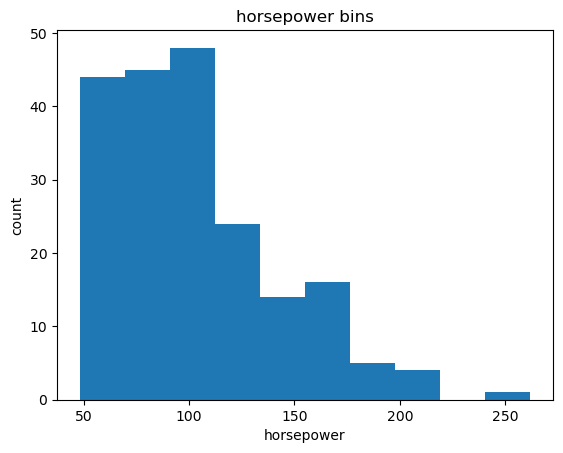

In [27]:
# S1: Binning to horsepower
# pre-binning
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

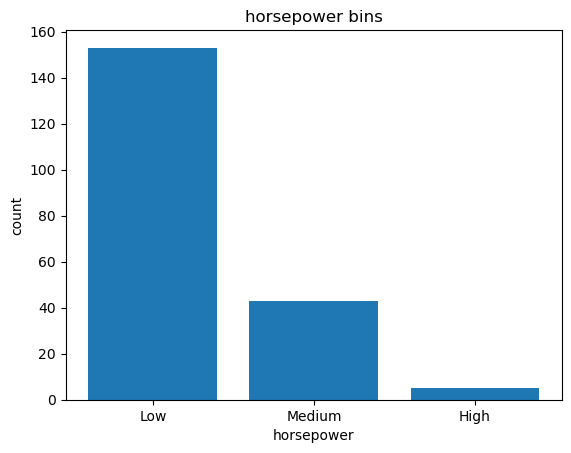

In [28]:
# binning
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Summary of dataset

In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int16   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore         

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330710,3.256904,10.164279,103.396985,5117.587891,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113281,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587891,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


## Saving Data set prepared

In [30]:
ds_prepared = "datasets/prepared/automobile.csv"
df.to_csv(ds_prepared, index=False)